*ASSIGNMENT 2*

**BMDP RATHNAYAKE**

**D/ENG/21/0046/ET**

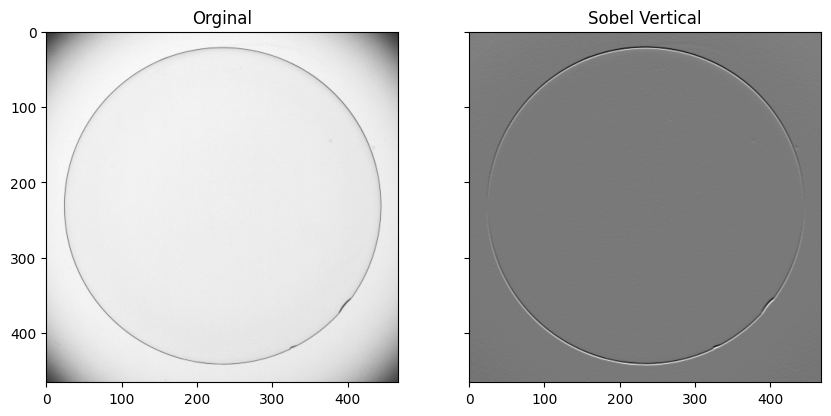

In [3]:
#QUESTION 1

#Sobel Vertical
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel Vertical')
plt.show()

**1.b**

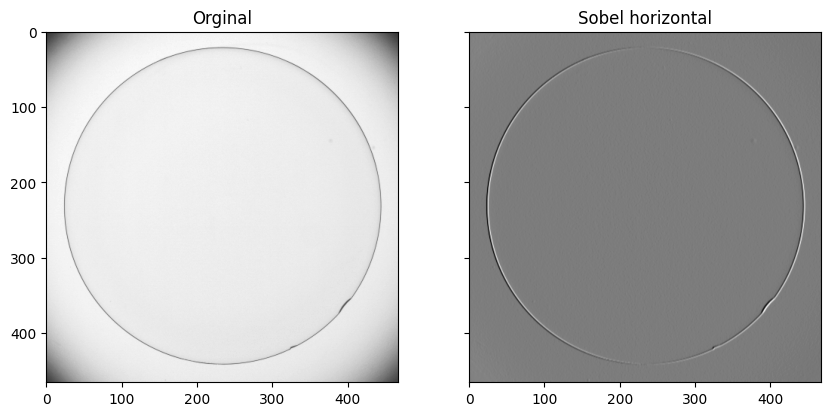

In [4]:
#Sobel horizontal
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel horizontal')
plt.show()

**1.c**

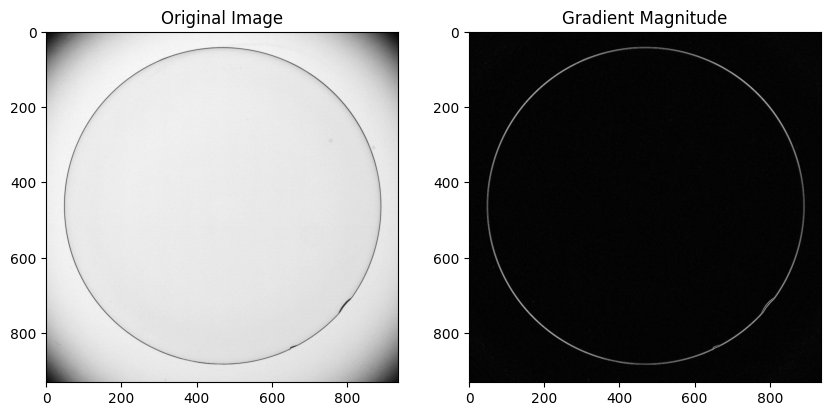

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded the image into a numpy array called "image"
# Compute the gradient in the x and y direction
image = cv.imread('images/contactlens.tif',cv.IMREAD_GRAYSCALE)
fx = np.gradient(image)[0]
fy = np.gradient(image)[1]

# Compute the gradient magnitude
gradient_mag = np.abs(fx) + np.abs(fy)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

# Display the gradient magnitude in the second subplot
axs[1].imshow(gradient_mag, cmap='gray')
axs[1].set_title('Gradient Magnitude')

# Show the figure
plt.show()




**1.d**

Text(0.5, 1.0, 'diameter')

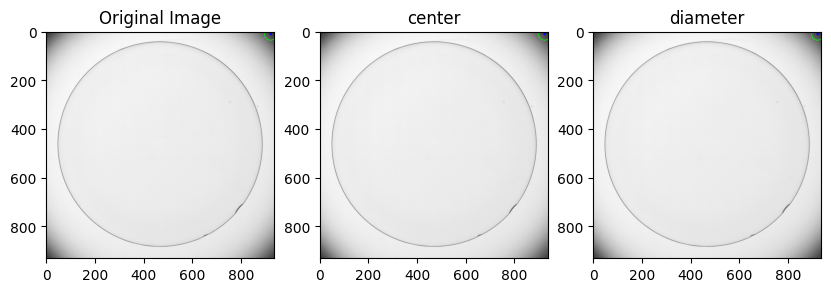

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('images/contactlens.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Threshold the image to create a binary image
ret, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)

# Find the contours of the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour, which should be the contact lens
largest_contour = max(contours, key=cv2.contourArea)

# Find the center of the contour by finding the average of all its points
M = cv2.moments(largest_contour)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# Find the diameter of the contour by finding the minimum enclosing circle
(x,y), radius = cv2.minEnclosingCircle(largest_contour)
diameter = int(radius * 2)

# Draw the center and diameter on the original image
center =cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)
diameterr=cv2.circle(img, (cx, cy), diameter//2, (0, 255, 0), 2)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(center, cmap='gray')
axs[1].set_title('center')

axs[2].imshow(diameterr, cmap='gray')
axs[2].set_title('diameter')




**02.a**

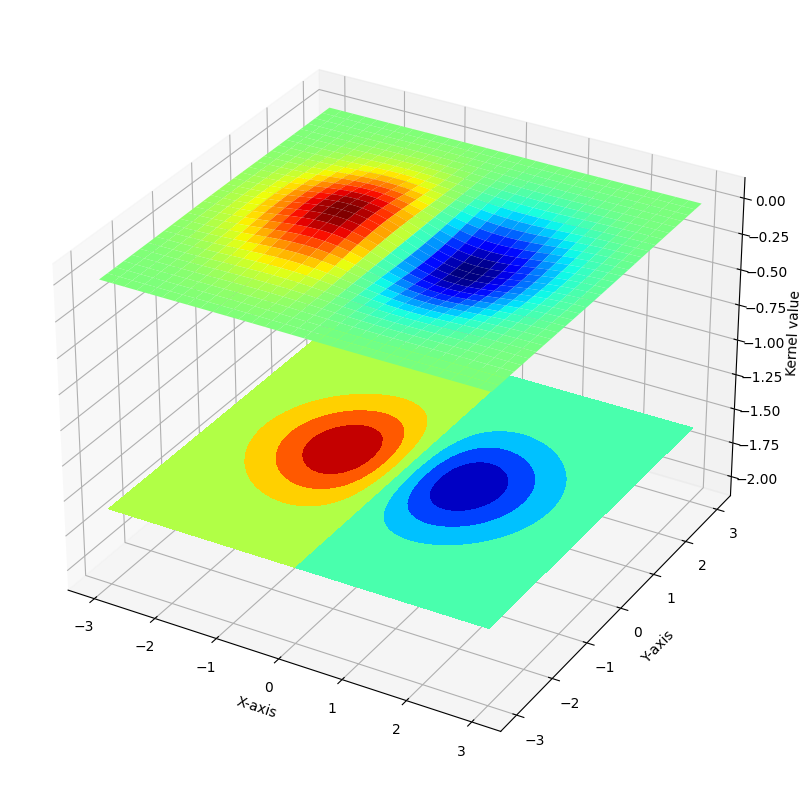

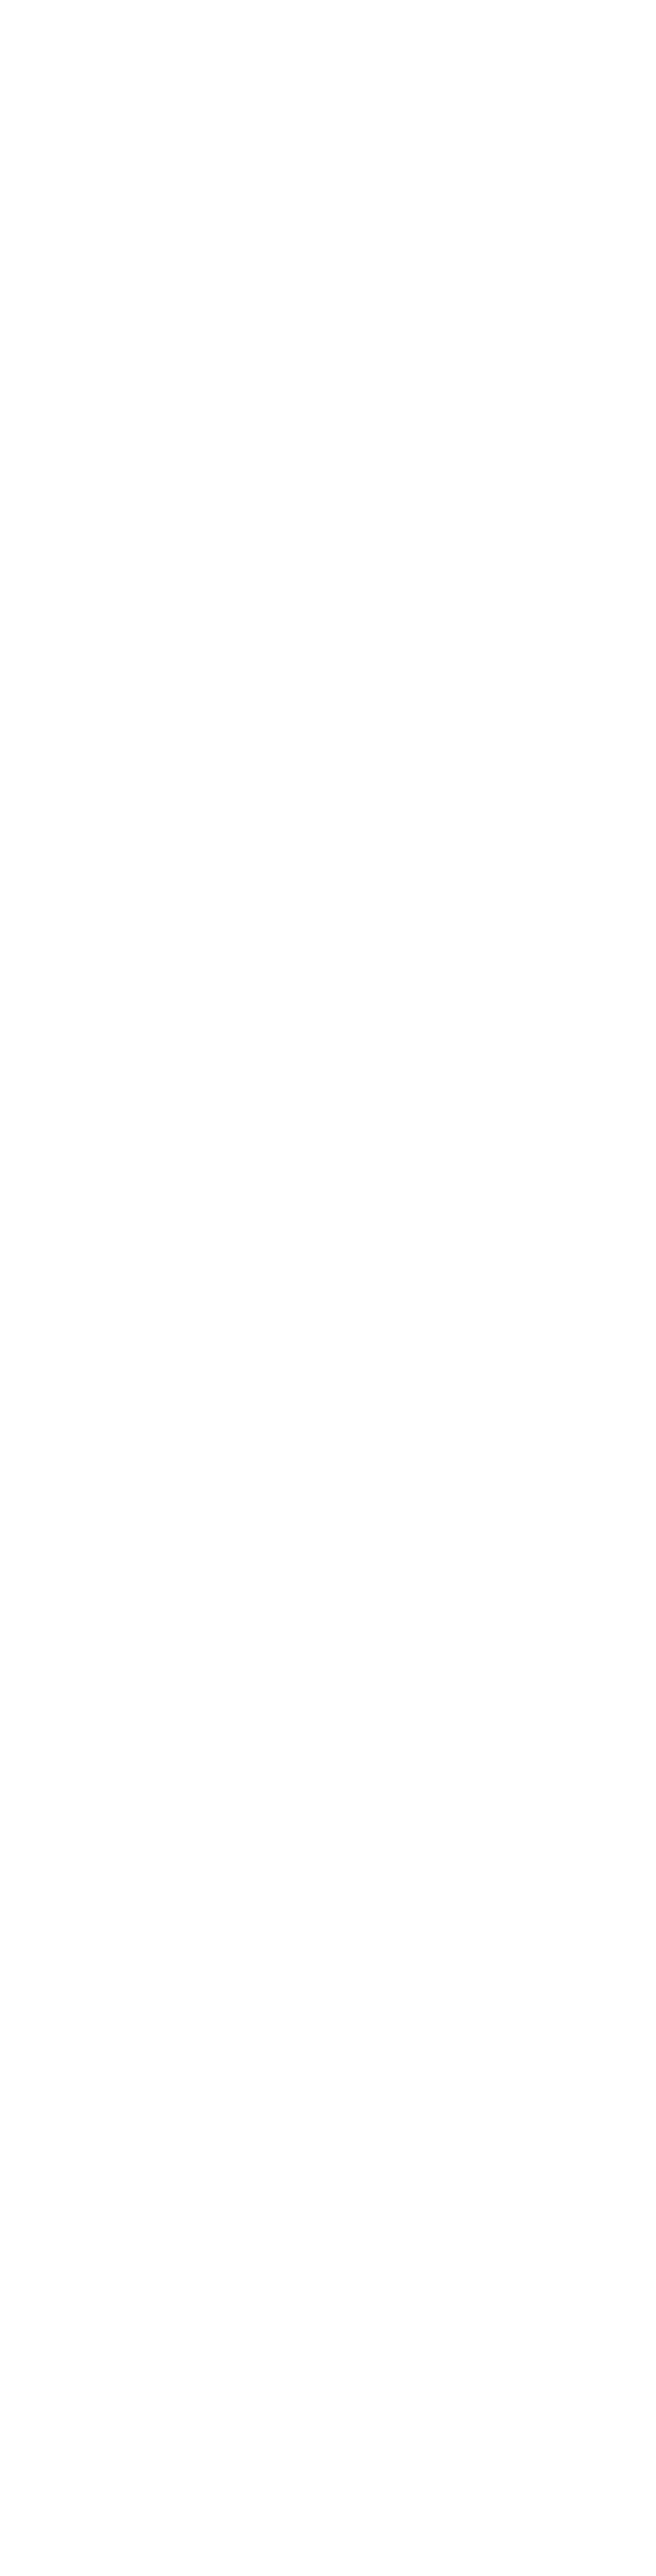

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the grid domain

x = y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x, y)

# Define sigma value
sigma = 1

# Compute the 3D Gaussian kernel
g = -X * np.exp(-(X**2 + Y**2)/(2*sigma**2)) / (2 * np.pi * sigma**4)

# Create 3D figure and plot the kernel
fig = plt.figure(figsize=(10,10))

ax=fig.add_subplot(111,projection='3d')

surf=ax.plot_surface(X,Y,g,cmap=cm.jet,linewidth=0,antialiased=True)
cset=ax.contourf(X,Y,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g) -2,np.max(g))
fig,axes=plt.subplots(1,1,figsize=(15,60))
plt.axis('off')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Kernel value')
plt.show()


**QUESTION 03** 

**a**

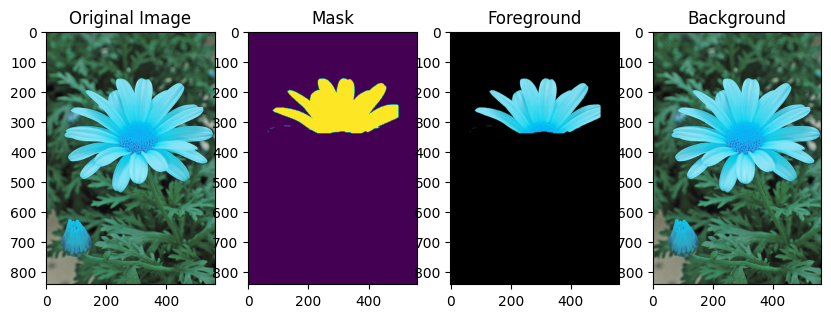

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('images/daisy.jpg')

# Create a mask with the same shape as the image
mask = np.zeros(img.shape[:2], np.uint8)

# Define the rectangular region of interest (ROI)
# The ROI should contain the object of interest
rect = (50, 50, 450, 290)

# Set the initial state of the mask to zero
# The pixels inside the ROI are set to cv2.GC_PR_FGD (probable foreground)
# The pixels outside the ROI are set to cv2.GC_PR_BGD (probable background)
cv2.grabCut(img, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# Create the final mask where the pixels marked as probable foreground
# and definite foreground are set to 1, and the rest are set to 0
mask_final = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Apply the final mask to the original image to get the foreground
foreground = cv2.bitwise_and(img, img, mask=mask_final)

# Get the background by subtracting the foreground from the original image
background = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask_final))

# Display the results


fig, axs = plt.subplots(1, 4, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(mask_final*255)
axs[1].set_title('Mask')

axs[2].imshow(foreground)
axs[2].set_title('Foreground')

axs[3].imshow(background)
axs[3].set_title('Background')

plt.show()

**b**

Text(0.5, 1.0, 'Enhanced Image')

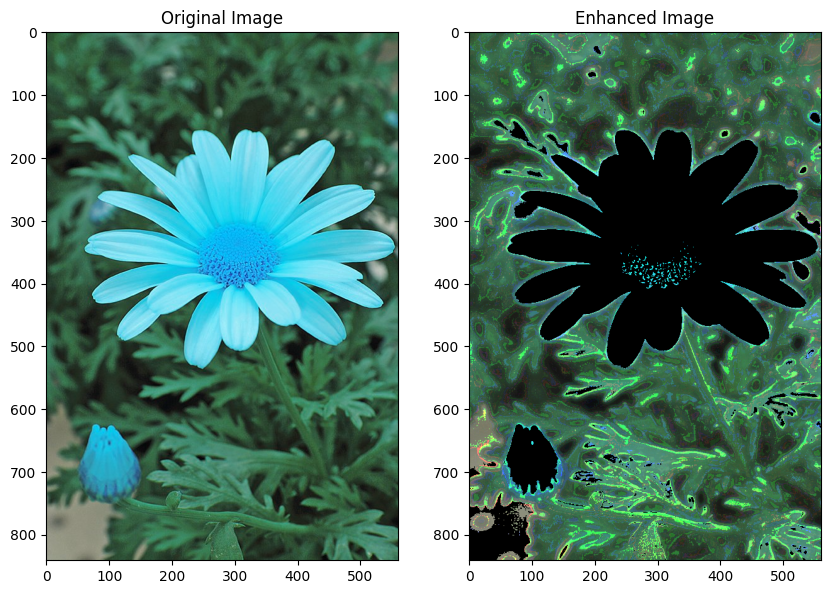

In [7]:
import cv2

# Load the image
img = cv2.imread('images/daisy.jpg')

# Perform image segmentation to separate foreground from background
# This step can be skipped if the foreground object(s) are already clearly defined
# You can use a variety of techniques for image segmentation such as thresholding, edge detection, etc.
# Here is an example using simple thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Apply a blur filter to the background
# Here we use a Gaussian blur filter with a kernel size of 25x25
blur = cv2.GaussianBlur(img, (25, 25), 0)

# Combine the blurred background with the foreground object(s)
enhanced_img = cv2.bitwise_or(blur, img, mask=thresh)

# Display the original image alongside the enhanced image

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(enhanced_img)
axs[1].set_title('Enhanced Image')

